In [12]:
import pandas as pd
import bs4 as bs
import datetime as dt
import os
from pandas_datareader import data as pdr
import pickle
import requests
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

In [7]:
def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
        
    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers,f)
        
    return tickers

In [8]:
yf.pdr_override()

def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text.replace('.', '-')
        ticker = ticker[:-1]
        tickers.append(ticker)
    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
    return tickers


# save_sp500_tickers()
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
    start = dt.datetime(2019, 6, 8)
    end = dt.datetime.now()
    for ticker in tickers:
        print(ticker)
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = pdr.get_data_yahoo(ticker, start, end)
            df.reset_index(inplace=True)
            df.set_index("Date", inplace=True)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))


save_sp500_tickers()
get_data_from_yahoo()


MMM
[*********************100%***********************]  1 of 1 completed
ABT
[*********************100%***********************]  1 of 1 completed
ABBV
[*********************100%***********************]  1 of 1 completed
ABMD
[*********************100%***********************]  1 of 1 completed
ACN
[*********************100%***********************]  1 of 1 completed
ATVI
[*********************100%***********************]  1 of 1 completed
ADBE
[*********************100%***********************]  1 of 1 completed
AMD
[*********************100%***********************]  1 of 1 completed
AAP
[*********************100%***********************]  1 of 1 completed
AES
[*********************100%***********************]  1 of 1 completed
AFL
[*********************100%***********************]  1 of 1 completed
A
[*********************100%***********************]  1 of 1 completed
APD
[*********************100%***********************]  1 of 1 completed
AKAM
[*********************100%******************

In [11]:
def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    main_df = pd.DataFrame()

    for count, ticker in enumerate(tickers):
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df.set_index('Date', inplace=True)

        df.rename(columns={'Adj Close': ticker}, inplace=True)
        df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')

        if count % 10 == 0:
            print(count)
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')


compile_data()

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
                   MMM        ABT       ABBV        ABMD         ACN  \
Date                                                                   
2019-06-10  162.239761  79.965683  71.570518  272.429993  182.121933   
2019-06-11  162.837479  79.818092  72.705223  262.029999  181.065369   
2019-06-12  162.933884  80.634766  73.077278  254.539993  182.270035   
2019-06-13  162.779633  80.969315  73.430702  255.529999  182.625519   
2019-06-14  160.697296  80.900444  73.188889  250.960007  182.645264   

                 ATVI        ADBE        AMD         AAP        AES  ...  \
Date                                                                 ...   
2019-06-10  45.709373  280.339996  33.230000  152.380966  15.895121  ...   
2019-06-11  46.394871  275.989990  32.410000  151.040970  15.846747  ...  

           MMM       ABT      ABBV      ABMD       ACN      ATVI      ADBE  \
MMM   1.000000  0.208027  0.023354  0.451757  0.648572 -0.279609 -0.100058   
ABT   0.208027  1.000000  0.548641  0.321601  0.566746  0.634472  0.667798   
ABBV  0.023354  0.548641  1.000000 -0.010890  0.497350  0.823477  0.811350   
ABMD  0.451757  0.321601 -0.010890  1.000000  0.369366 -0.029931  0.229047   
ACN   0.648572  0.566746  0.497350  0.369366  1.000000  0.318170  0.521000   

           AMD       AAP       AES  ...      WYNN       XEL       XRX  \
MMM  -0.242548  0.824362  0.696635  ...  0.855224  0.073469  0.688215   
ABT   0.618104  0.061868 -0.028026  ...  0.000556  0.418099 -0.266159   
ABBV  0.837998 -0.055355  0.135751  ... -0.114327  0.487231 -0.199740   
ABMD -0.153216  0.443294 -0.034062  ...  0.215823 -0.213988  0.021124   
ACN   0.277374  0.533422  0.571286  ...  0.545013  0.458888  0.311381   

          XLNX       XYL       YUM      ZBRA       ZBH      ZION       ZTS  
MMM   0.680160 

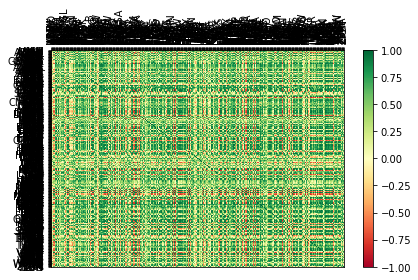

In [13]:
# Visualize Data
def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')
    #df['AAPL'].plot()
    #plt.show()
    df_corr = df.corr()
    print(df_corr.head())
    df_corr.to_csv('sp500corr.csv')

    data1 = df_corr.values
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)

    heatmap1 = ax1.pcolor(data1, cmap=plt.cm.RdYlGn)
    fig1.colorbar(heatmap1)

    ax1.set_xticks(np.arange(data1.shape[1]) + 0.5, minor=False)
    ax1.set_yticks(np.arange(data1.shape[0]) + 0.5, minor=False)
    ax1.invert_yaxis()
    ax1.xaxis.tick_top()
    column_labels = df_corr.columns
    row_labels = df_corr.index
    ax1.set_xticklabels(column_labels)
    ax1.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap1.set_clim(-1,1)
    plt.tight_layout()
    #plt.savefig("correlations.png", dpi = (300))
    plt.show()

visualize_data()